<a href="https://colab.research.google.com/github/dekoska/neural-network-course/blob/main/01_basics/07_nn_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

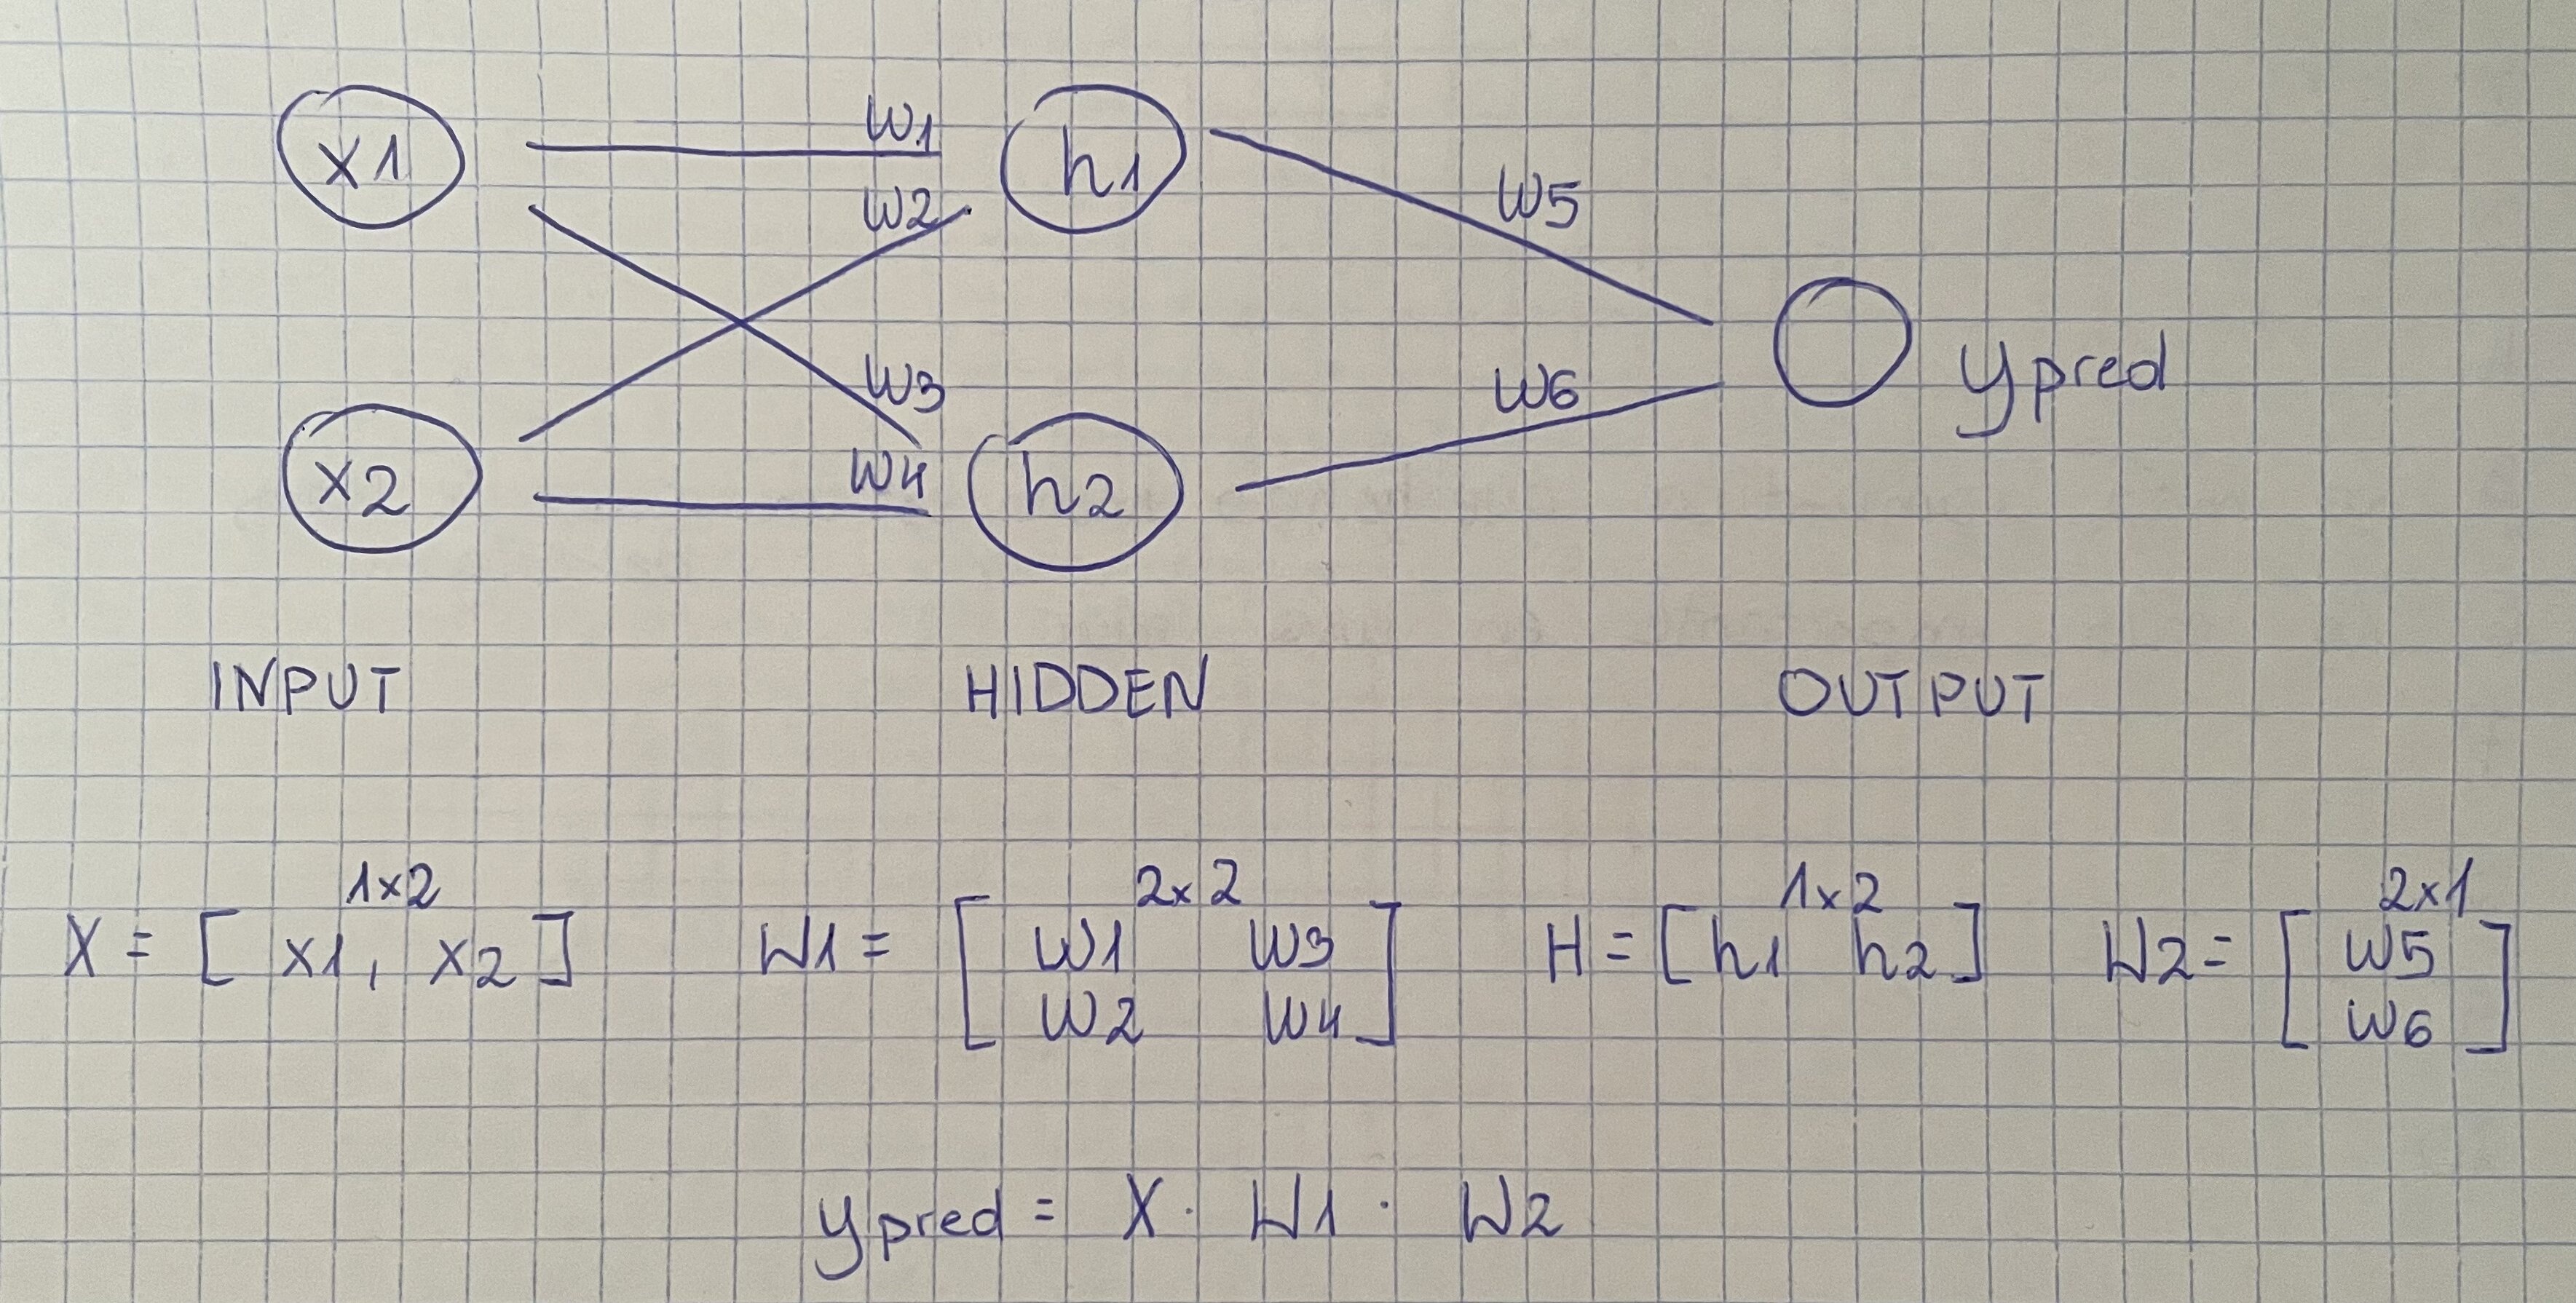

1. inicjalizacja parametrow
2. propagacja w przod
3. liczenie bledu predykcji
4. propagacja wsteczna jako uczenie modelu
5. test dzialania

In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

X = np.array([1.4, 0.7])
y_true = np.array([1.8])

In [5]:
def initialize_parameters(n_x, n_h, n_y): #definiujemy ilosc neuronow w warstwach
    W1 = np.random.rand(n_h, n_x)
    W2 = np.random.rand(n_h, n_y)

    return W1, W2

In [6]:
def forward_propagation(X, W1, W2):
  H1 = np.dot(X, W1)
  y_pred = np.dot(H1, W2)

  return H1, y_pred

In [9]:
def calculate_error(y_true, y_pred):
  error = y_true - y_pred
  return error

In [10]:
def predict(X, W1, W2):
  _, y_pred = forward_propagation(X, W1, W2)
  return y_pred[0]

In [11]:
def backpropagation(X, W1, W2, learning_rate, iters=1000, precision=0.0000001):

    H1, y_pred = forward_propagation(X, W1, W2)
    train_loss = []

    for i in range(iters):
        error = calculate_error(y_pred, y_true)
        W2 = W2 - learning_rate * error * H1.T
        W1 = W1 - learning_rate * error * np.dot(X.T, W2.T)

        y_pred = predict(X, W1, W2)
        print(f'Iter #{i}: y_pred {y_pred}: loss: {abs(calculate_error(y_pred, y_true[0]))}')
        train_loss.append(abs(calculate_error(y_pred, y_true[0])))

        if abs(error) < precision:
            break

    return W1, W2, train_loss

In [12]:
def build_model():

    W1, W2 = initialize_parameters(2, 2, 1)

    W1, W2, train_loss = backpropagation(X, W1, W2, 0.01)

    model = {'W1': W1, 'W2': W2, 'train_loss': train_loss}

    return model

In [13]:
model = build_model()

Iter #0: y_pred 0.47775082418068876: loss: 1.3222491758193113
Iter #1: y_pred 0.5203197164995874: loss: 1.2796802835004126
Iter #2: y_pred 0.5624603087798719: loss: 1.2375396912201282
Iter #3: y_pred 0.6041630898849911: loss: 1.195836910115009
Iter #4: y_pred 0.6454096471221384: loss: 1.1545903528778616
Iter #5: y_pred 0.686174266816854: loss: 1.113825733183146
Iter #6: y_pred 0.7264254411736586: loss: 1.0735745588263415
Iter #7: y_pred 0.7661272789328608: loss: 1.0338727210671392
Iter #8: y_pred 0.8052408159236343: loss: 0.9947591840763658
Iter #9: y_pred 0.8437252210745323: loss: 0.9562747789254677
Iter #10: y_pred 0.8815388936200005: loss: 0.9184611063799996
Iter #11: y_pred 0.9186404479839603: loss: 0.8813595520160398
Iter #12: y_pred 0.9549895839833127: loss: 0.8450104160166874
Iter #13: y_pred 0.9905478414374655: loss: 0.8094521585625345
Iter #14: y_pred 1.025279239868215: loss: 0.7747207601317851
Iter #15: y_pred 1.0591508056150682: loss: 0.7408491943849318
Iter #16: y_pred 1.09

In [14]:
loss = pd.DataFrame({'train_loss': model['train_loss']})
loss = loss.reset_index().rename(columns={'index': 'iter'})
loss['iter'] += 1
loss.head()

,iter,train_loss
0,1,1.322249
1,2,1.279680
2,3,1.237540
3,4,1.195837
4,5,1.154590


In [15]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=loss['iter'], y=loss['train_loss'], mode='markers+lines'))
fig.show()

In [16]:
predict(X, model['W1'], model['W2'])

np.float64(1.7999999093794767)